In [0]:
import numpy as np 
from astropy.io import ascii

import matplotlib.pyplot as plt
import seaborn as sns

# load in isochrone package

In [3]:
import sys
sys.path.append("/Users/yaguang/anaconda/envs/isochrones/lib/python3.7/site-packages")
# from isochrones.mist import MISTEvolutionTrackGrid
# grid_tracks = MISTEvolutionTrackGrid()
# print(len(grid_tracks.df))
# grid_tracks.df.head()

# Generate the stellar properties of synthetic stars from MIST
First I need to test if this works.

In [4]:
# from isochrones import get_ichrone
# tracks = get_ichrone('mist', tracks=True)
# mass, age, feh = (1.00, 9.72, 0.0)
# tracks.generate(mass, age, feh, return_dict=True)
from isochrones import get_ichrone

from isochrones.mist import MISTEvolutionTrackGrid, MISTIsochroneGrid

track_grid = MISTEvolutionTrackGrid()

property_list=["delta_nu", "nu_max", "phase", "age", "initial_mass", "mass", "density", "Teff", "logL",'radius','logg']
#['BP_mag','G_mag','H_mag', 'J_mag','K_mag','Kepler_mag','Mbol','RP_mag','TESS_mag','Teff','W1_mag','W2_mag','W3_mag','age','delta_nu','density','dt_deep','eep','feh','initial_mass','interpolated','logL','logTeff','logg','mass','nu_max','phase','radius','star_age']
track_grid.interp([-0.12, 1.01, 353.1], property_list)

ModuleNotFoundError: No module named 'isochrones'

Read in synthetic stars.

In [4]:
import ebf
d=ebf.read('/Users/yaguang/Onedrive/Work/nike/sample/kepler_galaxia_mrtd5.ebf','/')
Nstar = d["alpha"].shape[0]
Nproperty = len(property_list)
# mist = np.zeros((Nstar, Nproperty+3))
# property_input = np.array([d["smass"], d["log_age"], d["feh"]])
# properties = track_grid.interp(property_input, property_list)
# property_output = np.concatenate([property_input.T, properties],axis=1)
# output = np.array([tuple(property_output[i,:].tolist()) for i in range(Nstar)], dtype=[(p, '>f4') for p in ["feh", "smass", "log_age"]+property_list])
# np.save("sample/mist",output)

from isochrones import get_ichrone
tracks = get_ichrone('mist')
factor = int(Nstar/16000)
idx = np.arange(0,int(Nstar/factor))*factor
mass, age, feh = d["smass"][idx], d["log_age"][idx], d["feh"][idx]
# now clean up some mess that eep couldn't be generated
trash_points = [(1.313927173614502, 9.706974029541016, 0.6776756644248962),
                (1.347928524017334, 9.659332275390625, 0.6767454743385315),
                (1.313927173614502, 9.706974029541016, 0.6776756644248962),
                (1.396459698677063, 9.623114585876465, 0.5287598967552185),
                (1.2990785837173462, 9.726263999938965, 0.5043005347251892),
                (1.5403650999069214, 9.499214172363281, 0.5627012848854065),
                (1.200117826461792, 9.819570541381836, 0.5422018766403198),
                (1.0700803995132446, 9.974210739135742, 0.5239214301109314),
                (1.0907773971557617, 9.973261833190918, 0.7108012437820435),
                (1.3396896123886108, 9.662361145019531, 0.5656616687774658),
                (1.1802692413330078, 9.860368728637695, 0.7155909538269043),
                (1.3642323017120361, 9.663329124450684, 0.5944953560829163),
                (1.2346166372299194, 9.788309097290039, 0.5223724842071533),
                (1.1053928136825562, 9.963691711425781, 0.6884390711784363),
                (1.1053928136825562, 9.963691711425781, 0.6884390711784363),
                (1.556543231010437, 9.481904983520508, 0.596089780330658),
                (1.3418062925338745, 9.66604232788086, 0.579115629196167),
                (1.0958917140960693, 9.968875885009766, 0.6464157700538635),
                (1.1296329498291016, 9.912899017333984, 0.7266412377357483),
                (1.1752325296401978, 9.869548797607422, 0.5316367149353027),
                (1.0989367961883545, 9.956917762756348, 0.5183799266815186),
                (1.1793427467346191, 9.84288215637207, 0.6021394729614258),
                (1.1360722780227661, 9.898009300231934, 0.5938041806221008)]
for point in trash_points:
    idx = (mass!=point[0]) & (age!=point[1]) & (feh!=point[2])
    mass, age, feh = mass[idx], age[idx], feh[idx]

Nstar = mass.shape[0]
eep = tracks.get_eep(mass, age, feh, accurate=True, return_nan=True)

property_input = np.array([mass,age,feh])
property_from_mist = tracks.interp_value([eep, age, feh], property_list)
property_output = np.concatenate([property_input.T, property_from_mist], axis=1)
output = np.array([tuple(property_output[i,:].tolist()) for i in range(Nstar)], dtype=[(p, '>f4') for p in ["smass", "log_age", "feh"]+property_list])
np.save("sample/mist",output)

In [11]:
point=(1.1360722780227661, 9.898009300231934, 0.5938041806221008)
np.where((mass==point[0]) & (age==point[1]) & (feh==point[2]))[0]

array([16738])

# Quantify the edge
## padova stars, on the nike diagram

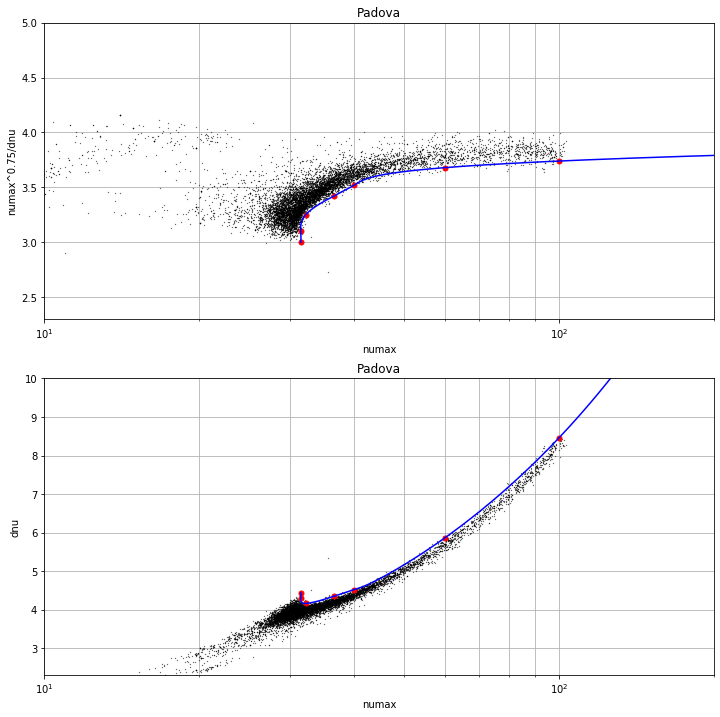

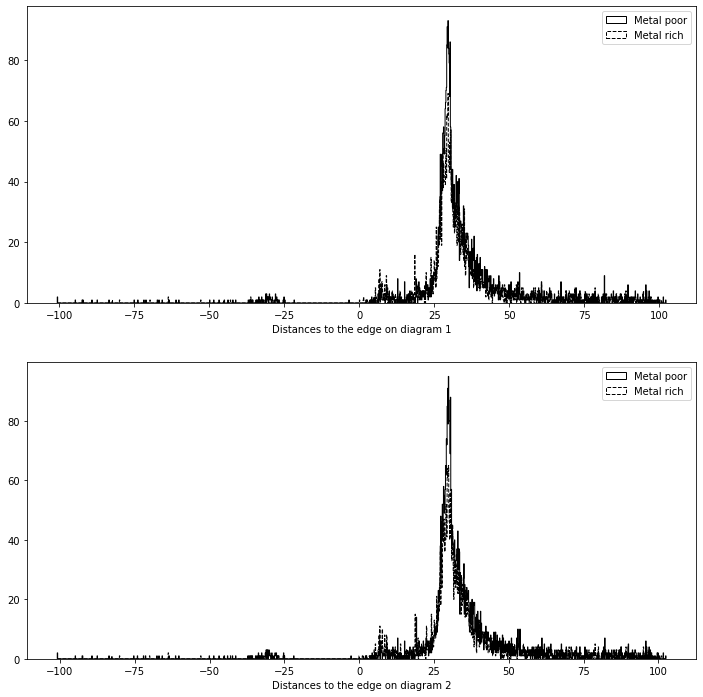

In [20]:
fig = plt.figure(figsize=(12,12))
axes = fig.subplots(nrows=2,ncols=1)
axes[0].axis([10, 200, 2.3, 5.0])
axes[0].set_xscale("log")
axes[1].axis([10, 200, 2.3, 10.0])
axes[1].set_xscale("log")

import ebf
synp=ebf.read("sample/kepler_galaxia_mrtd5.ebf")
Nstar = synp["alpha"].shape[0]
factor = int(Nstar/16000)
idx = np.arange(0,int(Nstar/factor))*factor
for key in synp.keys():
    synp[key] = synp[key][idx]

idx = (synp["evstate"]==2) & (np.isfinite(synp["numax"]))
xpdv, ypdv, ypdvt = synp["numax"][idx], synp["numax"][idx]**0.75/synp["dnu"][idx], synp["dnu"][idx]
Npdv = xpdv.shape[0]

# plot padova
axes[0].plot(xpdv, ypdv, "k.", markersize=0.5)
axes[0].set_title("Padova")
axes[0].grid(which="both")
axes[0].set_xlabel("numax")
axes[0].set_ylabel("numax^0.75/dnu")
axes[1].plot(xpdv, ypdvt, "k.", markersize=0.5)
axes[1].set_title("Padova")
axes[1].grid(which="both")
axes[1].set_xlabel("numax")
axes[1].set_ylabel("dnu")

# plot edge defining points
# points
points=[(31.5, 3.0), (31.5, 3.1), (32.2, 3.25), (36.5, 3.42), (40, 3.52), (60, 3.68), (100, 3.74)]
Npoint = len(points)
xpoint, ypoint = np.array([points[i][0] for i in range(Npoint)]), np.array([points[i][1] for i in range(Npoint)])
axes[0].plot(xpoint, ypoint, "r.", markersize=10)
axes[1].plot(xpoint, xpoint**0.75/ypoint, "r.", markersize=10)

# cubic spline interpolation
import scipy
tck = scipy.interpolate.splrep(np.log10(ypoint), np.log10(xpoint), s=0)
np.save("sample/padova/spline_tck", tck)
yedge = np.arange(3.0, 4.0, 0.001)
xedge = 10.0**scipy.interpolate.splev(np.log10(yedge), tck, der=0)
Nedge = xedge.shape[0]
axes[0].plot(xedge, yedge, "b-") 
axes[1].plot(xedge, xedge**0.75/yedge, "b-") 

# # left or right?
idx_left = xpdv<=10.0**scipy.interpolate.splev(np.log10(ypdv), tck, der=0)
idx_right = xpdv>10.0**scipy.interpolate.splev(np.log10(ypdv), tck, der=0)
idx_mrich = synp["feh"][idx]>=0
idx_mpoor = synp["feh"][idx]<0

# # shortest distance distribution
X = np.zeros((Npdv+Nedge, 2))
X[0:Npdv,0], X[0:Npdv,1] = xpdv, ypdv
X[Npdv:,0], X[Npdv:,1] = xedge, yedge
Y = scipy.spatial.distance.pdist(X)
sdist=Y[0:Npdv]
sdist[idx_right]=-sdist[idx_right]
np.save("sample/padova/nike_edge_samples", X[Npdv:,])

X[0:Npdv,0], X[0:Npdv,1] = xpdv, ypdvt
X[Npdv:,0], X[Npdv:,1] = xedge, xedge**0.75/yedge
Y = scipy.spatial.distance.pdist(X)
sdistt=Y[0:Npdv]
sdistt[idx_right]=-sdistt[idx_right]


fig = plt.figure(figsize=(12,12))
axes = fig.subplots(nrows=2,ncols=1)
# axes[0].set_xlim(-15, 20)
# axes[1].set_xlim(-15, 20)
bins0 = np.linspace(sdist.min(), sdist.max(), 1500)
bins1 = np.linspace(sdistt.min(), sdistt.max(), 1500)
h=axes[0].hist(sdist[idx_mpoor], color="black", histtype="step", label="Metal poor",
    bins=bins0, zorder=0)
h=axes[0].hist(sdist[idx_mrich], color="black", linestyle="--", histtype="step", label="Metal rich",
    bins=bins0, zorder=0)
h=axes[1].hist(sdistt[idx_mpoor], color="black", histtype="step", label="Metal poor",
    bins=bins1, zorder=0)
h=axes[1].hist(sdistt[idx_mrich], color="black", linestyle="--", histtype="step", label="Metal rich",
    bins=bins1, zorder=0)
axes[0].set_xlabel("Distances to the edge on diagram 1")
axes[0].legend()
axes[1].set_xlabel("Distances to the edge on diagram 2")
axes[1].legend()

In [10]:
sdist

array([ 0.15424698,  5.1222516 , 41.95632404, ..., 29.98541952,
       29.01810955, 46.82889454])

# Difference of edge: numax-dnu  relation

Text(0.5, 0, 'Numax')

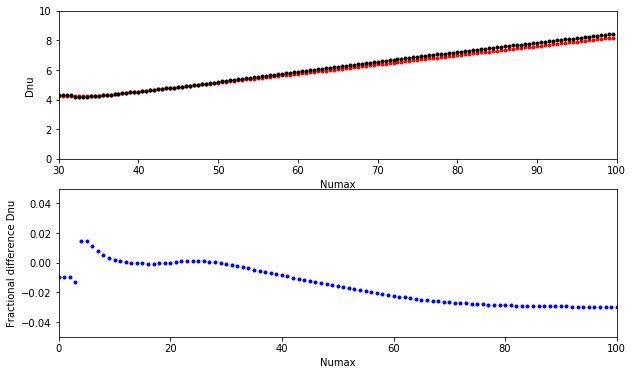

In [50]:
# cubic spline interpolation
import scipy
tck_pdv = np.load("sample/padova_spline.npy", allow_pickle=True)
tck_obs = np.load("sample/spline.npy", allow_pickle=True)
yedge = np.arange(3.1, 4.0, 0.001) 
xedge_pdv = 10.0**scipy.interpolate.splev(np.log10(yedge), tck_pdv, der=0)
xedge_obs = 10.0**scipy.interpolate.splev(np.log10(yedge), tck_obs, der=0)

dnu_obs, numax_obs = xedge_obs**0.75/yedge, xedge_obs
dnu_pdv, numax_pdv = xedge_pdv**0.75/yedge, xedge_pdv

numax = np.arange(30, 100, 0.5)
dnu_obs = np.interp(numax, numax_obs, dnu_obs)
dnu_pdv = np.interp(numax, numax_pdv, dnu_pdv)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
axes = fig.subplots(nrows=2, ncols=1, squeeze=False).reshape(-1)
axes[0].set_ylim(0,10)
axes[0].set_xlim(30,100)
axes[0].plot(numax, dnu_obs, "r.")
axes[0].plot(numax, dnu_pdv, "k.")
axes[0].set_ylabel("Dnu")
axes[0].set_xlabel("Numax")

axes[1].set_xlim(0,100)
axes[1].set_ylim(-0.05, 0.05)
axes[1].plot((dnu_obs-dnu_pdv)/dnu_obs, "b.")
axes[1].set_ylabel("Fractional difference Dnu")
axes[1].set_xlabel("Numax")

In [36]:
numax_obs-numax_pdv

array([    30.75567764,     30.50599267,     30.25790583, ...,
       -12941.56957722, -13302.90204262, -13673.06309644])